In [1]:
from heart_disease_dataset.transformation_pipeline import (
    get_transformed_data,
)


X_transformed, y = get_transformed_data()

In [2]:
from heart_disease_dataset.transformation_pipeline import (
    get_categorical_features,
    get_numerical_features,
)

categorical_features = get_categorical_features()
numerical_features = get_numerical_features()

columns = categorical_features + numerical_features

In [3]:
X_transformed.shape, y.shape

((820, 13), (820, 1))

In [4]:
import numpy as np
import pandas as pd

y = y.reshape(-1, 1)

# Concatenate y as the last column of X
X_with_y = np.hstack((X_transformed, y))

df = pd.DataFrame(
    X_with_y, columns=numerical_features + categorical_features + ["num"]
)

In [7]:
df

,age,ca,chol,oldpeak,thalach,trestbps,sex,cp,fbs,restecg,exang,slope,thal,num
0,0.948726,-0.723095,-0.264900,1.087338,0.017197,0.757525,1.0,1.0,1.0,2.0,0.0,3.0,6.0,0.0
1,1.392002,2.503851,0.760415,0.397182,-1.821905,1.611220,1.0,4.0,0.0,2.0,1.0,2.0,3.0,2.0
2,1.392002,1.428203,-0.342283,1.346147,-0.902354,-0.665300,1.0,4.0,0.0,2.0,1.0,2.0,7.0,1.0
3,-1.932564,-0.723095,0.063974,2.122573,1.637359,-0.096170,1.0,3.0,0.0,0.0,0.0,3.0,3.0,0.0
4,-1.489288,-0.723095,-0.825922,0.310912,0.980537,-0.096170,0.0,2.0,0.0,2.0,0.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,-1.036039,-0.723095,-0.166431,1.769730,0.021357,0.343483,1.0,4.0,0.0,2.0,1.0,2.0,7.0,4.0
816,0.414912,0.385361,-0.333558,1.246721,0.629947,-1.063320,1.0,4.0,0.0,2.0,1.0,2.0,7.0,4.0
817,0.082870,0.392727,0.758483,-0.155153,-0.223004,1.547452,1.0,4.0,0.0,2.0,0.0,2.0,7.0,4.0
818,0.707430,0.543373,-1.423778,2.025192,-1.023131,0.278363,1.0,4.0,0.0,2.0,0.0,2.0,7.0,4.0


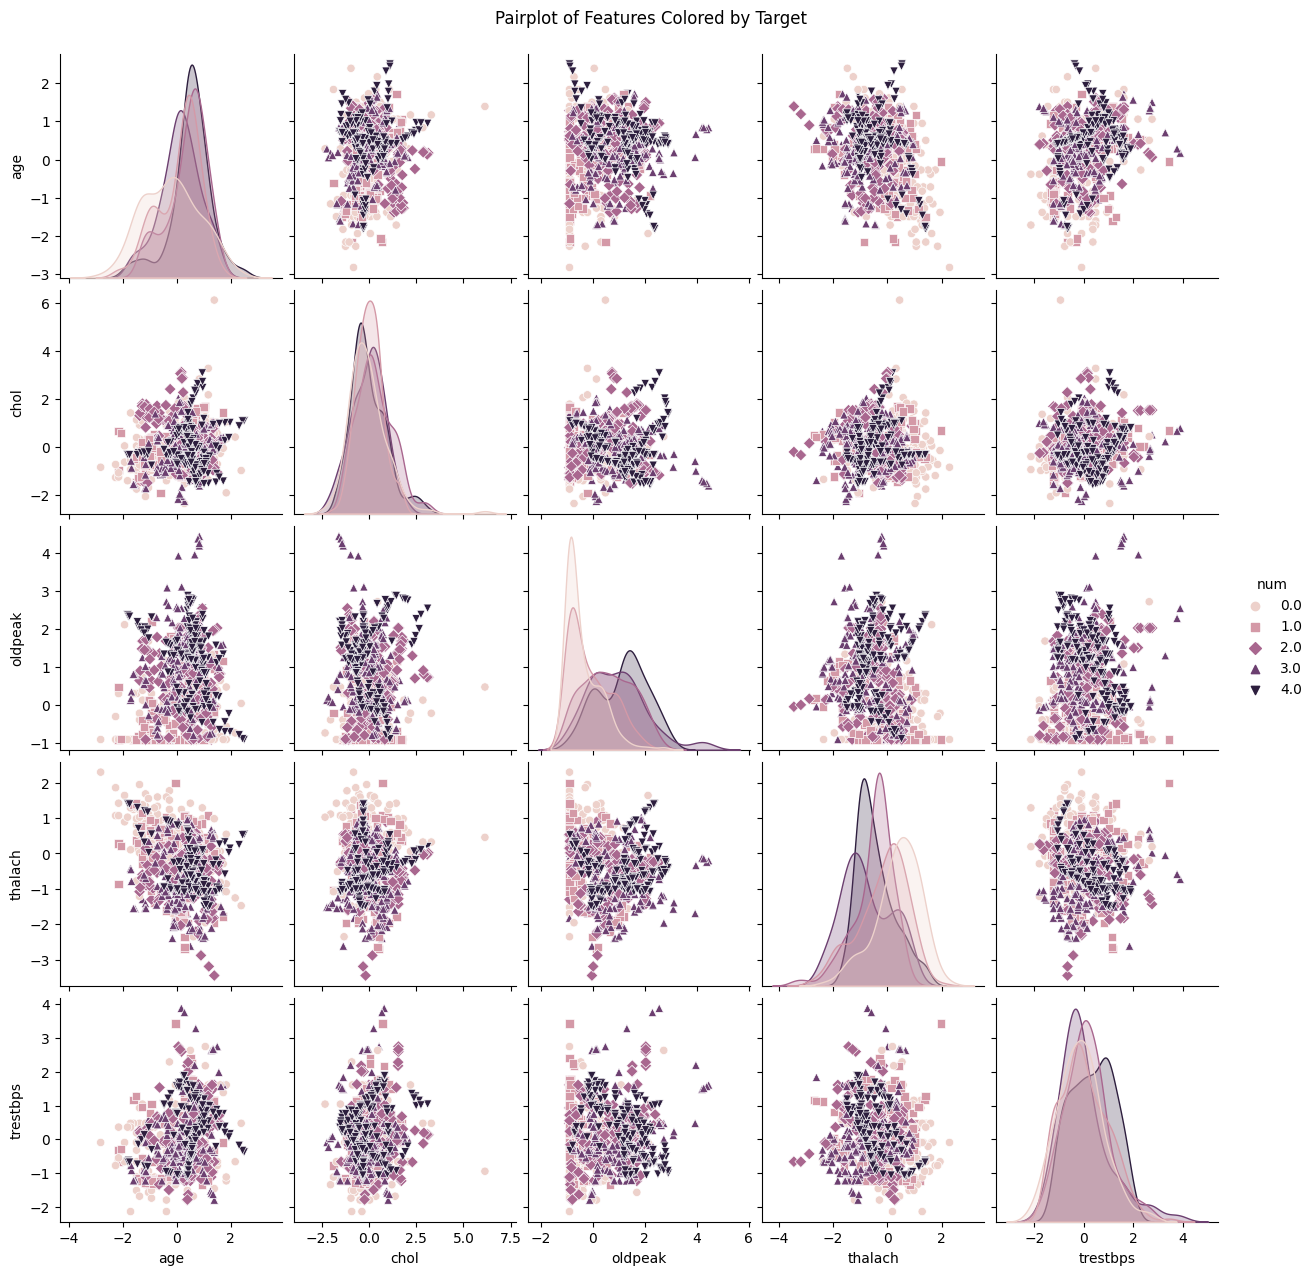

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

features = get_numerical_features() + ["num"]
features.remove("ca")

sns.pairplot(df[features], hue="num", diag_kind="kde", markers=["o", "s", "D", "^", "v"])
plt.suptitle("Pairplot of Features Colored by Target", y=1.02)
plt.show()

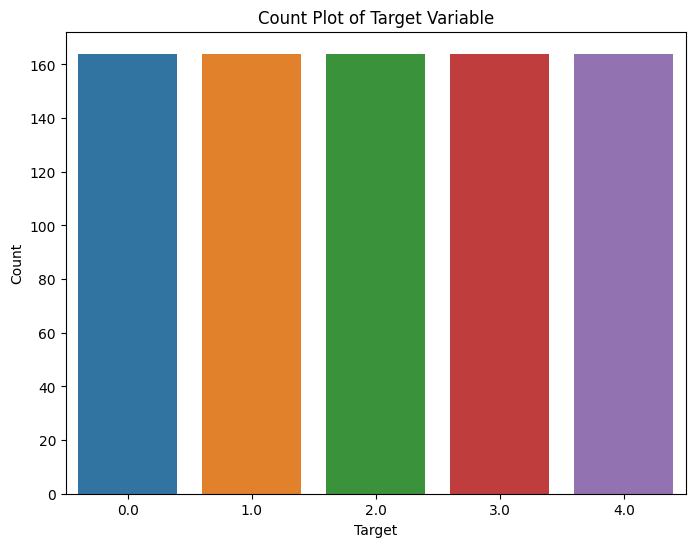

In [10]:
# Count Plot for Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x="num", data=df)
plt.title("Count Plot of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()